In [ ]:
#!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
#pip install lazypredict

In [2]:
#@title Load coordinates nearest points
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn.pipeline import Pipeline
import pickle
from scipy.stats import chi2_contingency

pd.options.display.max_rows = 999


coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/distan_lat41.296lon2.078p2R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

Weather frequencies


M                 94.43%
-RA                1.96%
-DZ                0.72%
RA                 0.63%
BR                 0.53%
SHRA               0.18%
VCTS               0.14%
-SHRA              0.13%
TSRA               0.12%
VCSH               0.09%
TS                 0.08%
DZ                 0.07%
+RA                0.07%
+TSRA              0.07%
-TSRA              0.06%
-RA BR             0.05%
-RA VCTS           0.05%
BCFG               0.05%
+SHRA              0.04%
BR -RA             0.04%
BR BCFG            0.04%
-RA VCSH           0.03%
FG                 0.03%
VCFG               0.02%
BR -DZ             0.02%
TS -RA             0.02%
VCTS -RA           0.02%
-SHRA VCTS         0.02%
RA VCTS            0.02%
SHRA VCTS          0.01%
+SHRA VCTS         0.01%
-DZ BR             0.01%
RA BR              0.01%
BR RA              0.01%
-RA TS             0.01%
BR DZ              0.01%
TS VCSH            0.01%
BR VCFG            0.01%
VCSH -RA           0.01%
BCFG BR            0.01%


*****************************
Climatology BR FG


No BR/FG    99%
BR/FG        1%
Name: brfg_l, dtype: object

*****************************


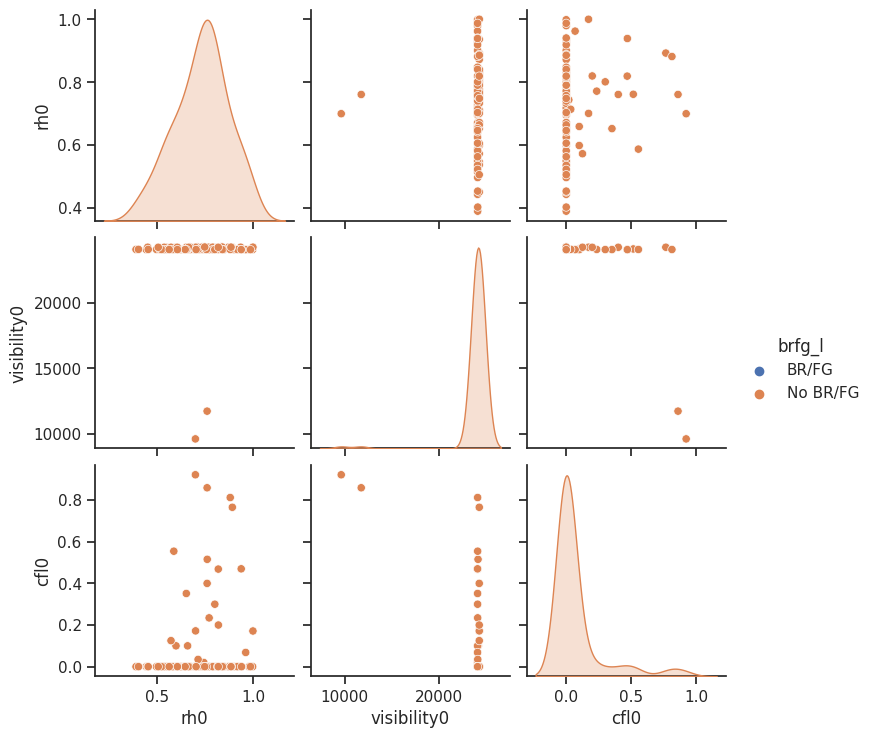

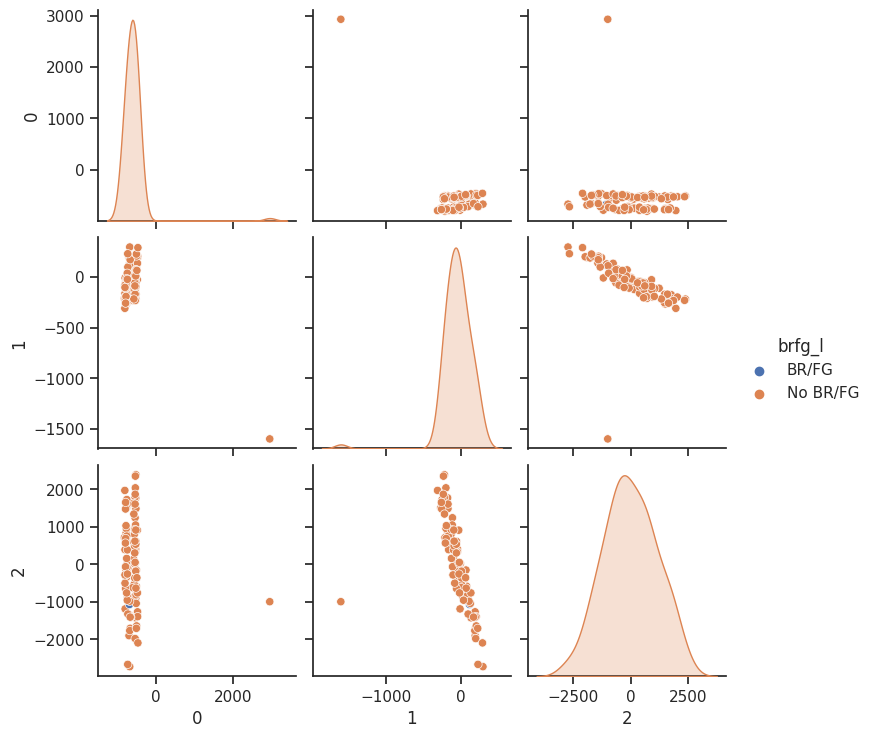

In [3]:
#@title Load station (present weather). Load meteorological model forecast D0. Display relation BRFG with model variables.
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/LEBLY2018Y2022.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

print("Weather frequencies")
display(station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n)))

#label br/fg if weather code contains FG or BR
station["brfg_l"] = "No BR/FG"
mask = station['wxcodes_o'].str.contains("BR")
station.loc[mask,["brfg_l"]] = "BR/FG"
mask = station['wxcodes_o'].str.contains("FG")
station.loc[mask,["brfg_l"]] = "BR/FG"
station["brfg_l"]=pd.Categorical(station["brfg_l"])

#display(station.sample(50).head(20))
print("*****************************")
print("Climatology BR FG")
display(station["brfg_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x)))

#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD0Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD0Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD0Y2020.csv",parse_dates=["time"])

model = pd.concat([mody2018,mody2019,mody2020,]).drop(columns=["Unnamed: 0"]).set_index("time")

#concat station file versus meteorological model file same time
df_all = pd.concat([station,model],axis=1).drop(columns=["wxcodes_o",]).dropna()
#display(df_all)

#display relation br fg with meteorological model variables
print("*****************************")

sns.set_theme(style="ticks")
df = df_all[["brfg_l","rh0","visibility0","cfl0"]].sample(100)
#plt.figure(figsize=(12, 10))
#plt.title("Display relation br fg with meteorological model variables sample=100")
g1 = sns.pairplot(df, hue="brfg_l");
plt.show()

#display relation br fg with meteorological PCA
df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all.iloc[:,1:]),
                                                       index =df_all.index)
df_pca["brfg_l"] = df_all.brfg_l
#plt.figure(figsize=(12, 10))
#plt.title("PCA analysis sample=100")
g2 = sns.pairplot(df_pca.sample(100), hue="brfg_l");
plt.show()




Round 0


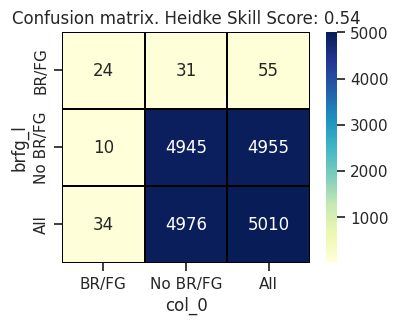

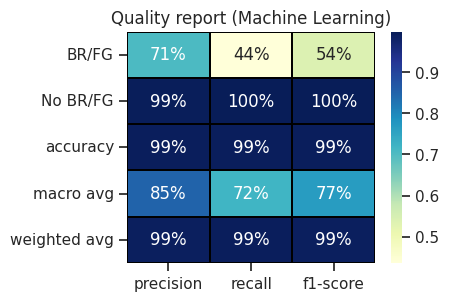

,feature,feature_per
32,rh1,4.0%
50,hour,3.6%
33,visibility1,3.5%
0,dir0,3.5%
25,dir1,3.4%
48,T5001,3.3%
31,temp1,3.2%
8,visibility0,3.2%
52,dayofyear,3.2%
24,T8500,3.0%


Round 1


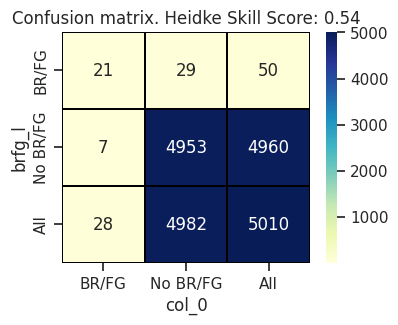

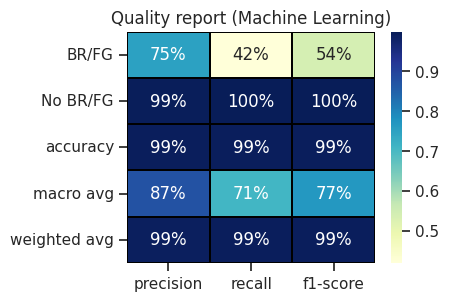

,feature,feature_per
32,rh1,4.2%
50,hour,3.9%
52,dayofyear,3.6%
48,T5001,3.6%
8,visibility0,3.5%
0,dir0,3.2%
31,temp1,3.0%
49,T8501,2.9%
6,temp0,2.8%
25,dir1,2.7%


Round 2


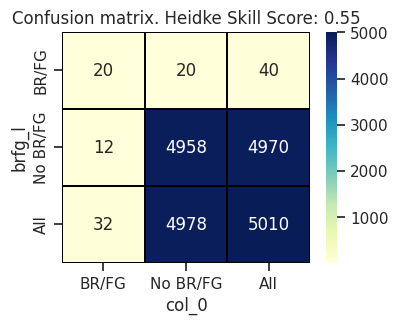

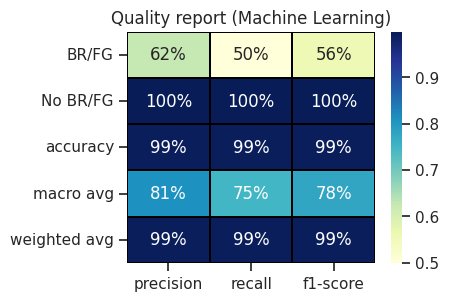

,feature,feature_per
52,dayofyear,3.9%
32,rh1,3.6%
8,visibility0,3.5%
14,shflx0,3.3%
50,hour,3.3%
48,T5001,3.0%
6,temp0,2.9%
25,dir1,2.9%
49,T8501,2.8%
31,temp1,2.8%


Round 3


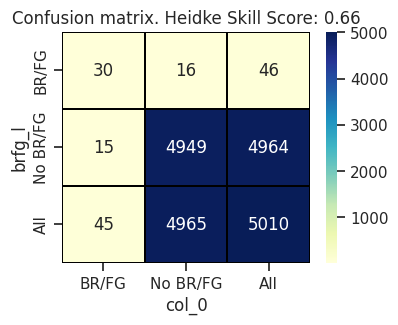

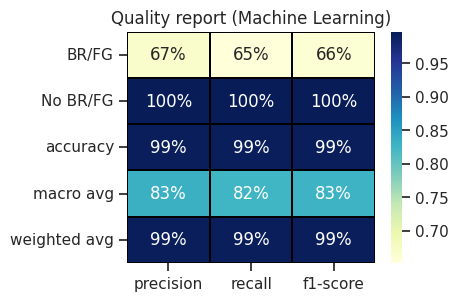

,feature,feature_per
52,dayofyear,3.8%
31,temp1,3.6%
32,rh1,3.5%
50,hour,3.5%
8,visibility0,3.2%
48,T5001,3.1%
0,dir0,3.0%
35,lwflx1,2.9%
25,dir1,2.9%
49,T8501,2.7%


Round 4


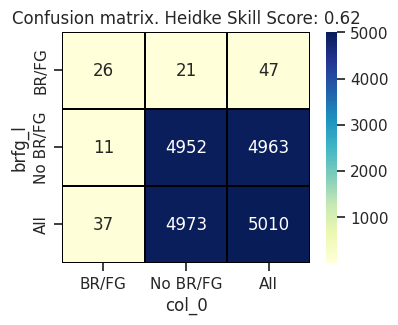

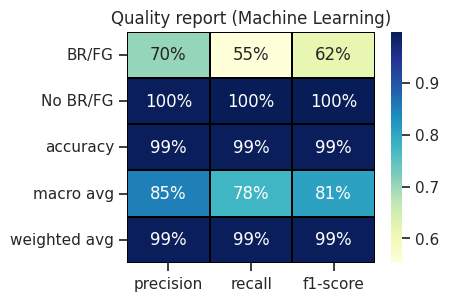

,feature,feature_per
52,dayofyear,3.7%
31,temp1,3.5%
32,rh1,3.2%
8,visibility0,3.2%
24,T8500,3.1%
50,hour,3.1%
48,T5001,3.0%
35,lwflx1,2.9%
6,temp0,2.9%
0,dir0,2.8%


Round 5


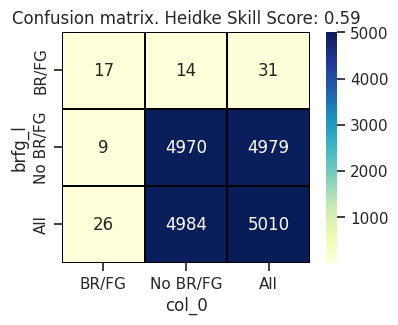

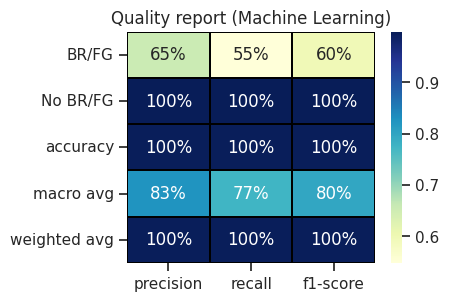

,feature,feature_per
52,dayofyear,4.0%
32,rh1,4.0%
50,hour,3.2%
8,visibility0,3.2%
25,dir1,3.1%
31,temp1,3.1%
48,T5001,3.0%
0,dir0,2.9%
42,cfh1,2.9%
14,shflx0,2.7%


Round 6


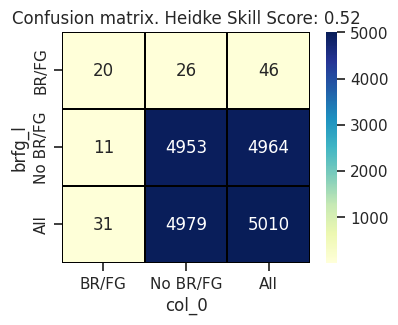

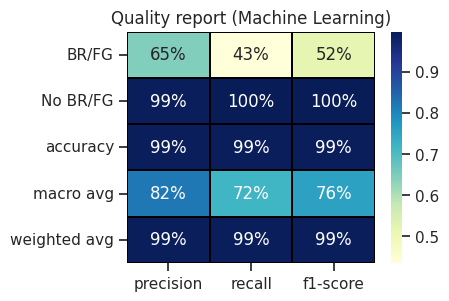

,feature,feature_per
50,hour,3.6%
52,dayofyear,3.6%
8,visibility0,3.6%
32,rh1,3.5%
31,temp1,3.3%
25,dir1,3.2%
49,T8501,3.0%
33,visibility1,3.0%
5,mslp0,2.8%
6,temp0,2.7%


Round 7


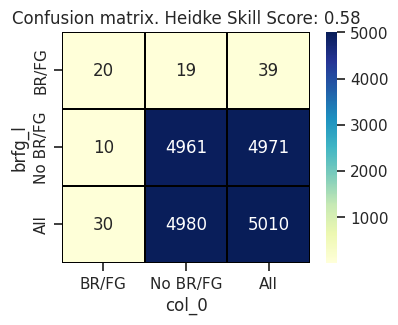

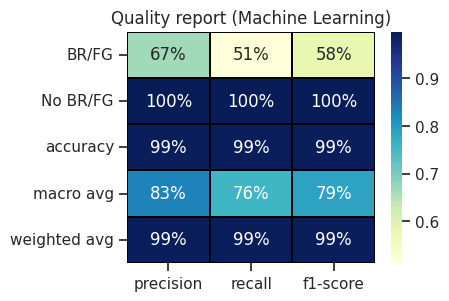

,feature,feature_per
32,rh1,3.7%
52,dayofyear,3.5%
0,dir0,3.3%
50,hour,3.3%
25,dir1,3.2%
33,visibility1,3.2%
8,visibility0,3.1%
31,temp1,3.1%
35,lwflx1,3.0%
49,T8501,2.8%


Round 8


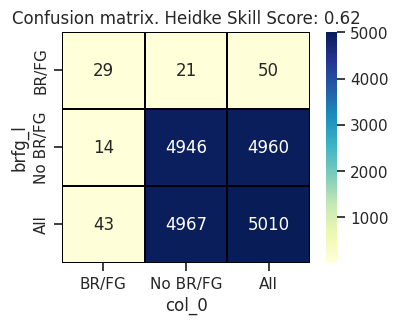

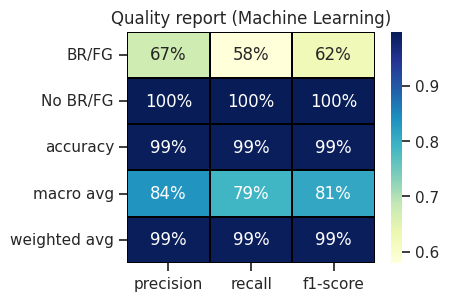

,feature,feature_per
52,dayofyear,4.2%
32,rh1,3.8%
50,hour,3.5%
33,visibility1,3.1%
31,temp1,3.0%
25,dir1,2.8%
0,dir0,2.7%
14,shflx0,2.7%
48,T5001,2.7%
24,T8500,2.6%


Round 9


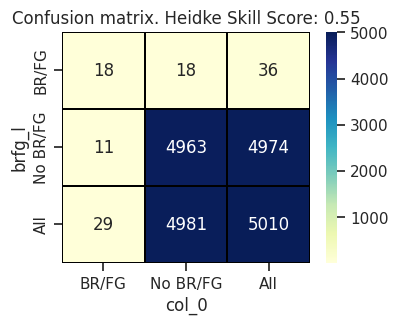

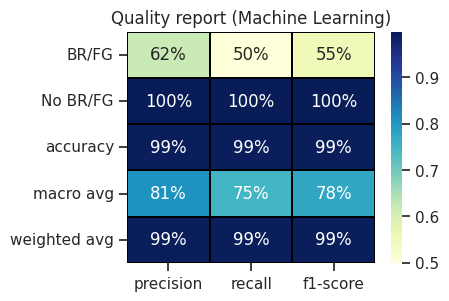

,feature,feature_per
50,hour,4.0%
52,dayofyear,3.5%
25,dir1,3.4%
48,T5001,3.3%
32,rh1,3.2%
8,visibility0,3.0%
31,temp1,2.9%
5,mslp0,2.9%
0,dir0,2.8%
6,temp0,2.8%



HSS stadistics
             HSS
count  10.000000
mean    0.575310
std     0.045233
min     0.515902
25%     0.539314
50%     0.564612
75%     0.610455
max     0.656219
Shapiro test normality
p value: 0.6247745752334595
Accept null hypothesis: normal distribution variable HSS in the samples
chi2_contingency last round
p-value: 0.0
Significance level: 0.01
Degres of of freedom:  1
Stadistic 1453.6557138393728
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 1.06 minutes


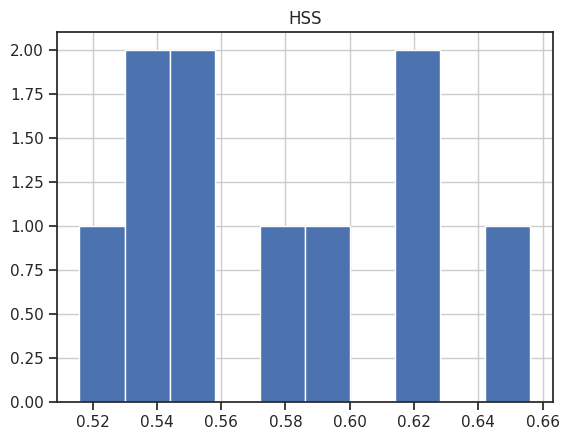

In [4]:
#@title ML LGBMClassifier. Samples 10. Heidke Skill score.

from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

start_time = time.time()

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.brfg_l
X = df_all.iloc[:,1:]


# loop random
HSS = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  plt.figure(figsize=(4, 3))
  plt.title("Confusion matrix. Heidke Skill Score: {}".format(round(HSS[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])



print("\nHSS stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(HSS,columns=["HSS"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")




In [5]:
#@title Save last algorithm round 9


x_var = X.columns
score = {"HSS_ml":HSS[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/LEBL/algorithms/brfg_LEBL_d0.al", 'wb'))

Round 0


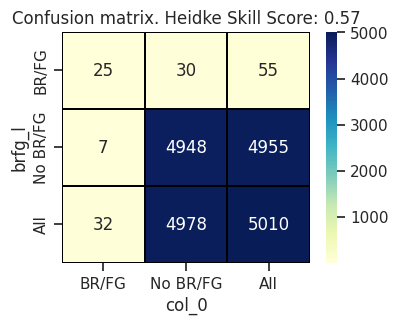

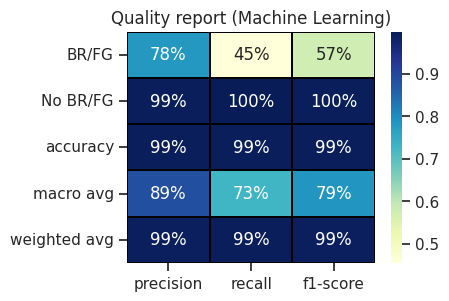

,feature,feature_per
32,rh1,7.4%
7,rh0,7.0%
51,month,4.5%
53,weekofyear,3.6%
52,dayofyear,3.5%
34,lhflx1,3.4%
50,hour,3.3%
31,temp1,3.3%
38,swflx1,3.0%
9,lhflx0,2.7%


Round 1


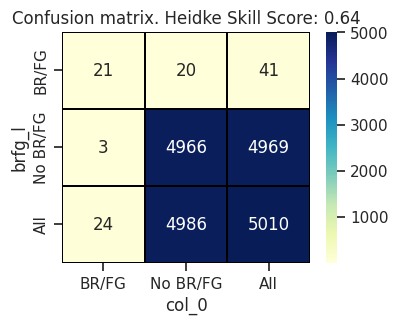

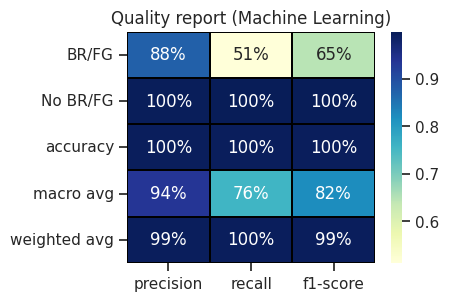

,feature,feature_per
7,rh0,7.1%
32,rh1,6.0%
51,month,4.0%
50,hour,3.8%
53,weekofyear,3.7%
52,dayofyear,3.7%
34,lhflx1,3.5%
31,temp1,3.2%
6,temp0,2.5%
33,visibility1,2.5%


Round 2


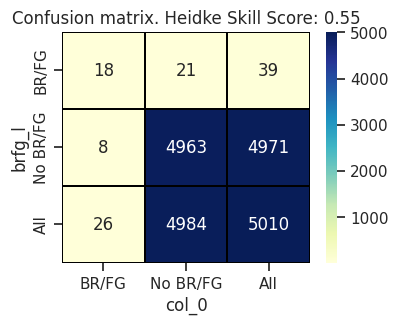

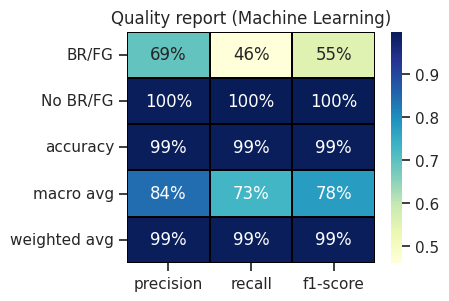

,feature,feature_per
32,rh1,7.3%
7,rh0,6.1%
51,month,4.5%
52,dayofyear,4.0%
53,weekofyear,3.9%
34,lhflx1,3.6%
50,hour,3.4%
31,temp1,2.8%
9,lhflx0,2.7%
24,T8500,2.6%


Round 3


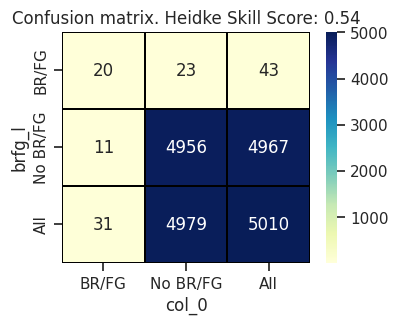

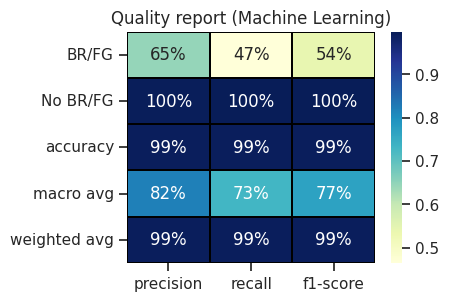

,feature,feature_per
32,rh1,6.3%
7,rh0,6.1%
31,temp1,3.9%
50,hour,3.8%
53,weekofyear,3.6%
34,lhflx1,3.5%
51,month,3.5%
52,dayofyear,3.1%
9,lhflx0,2.9%
24,T8500,2.6%


Round 4


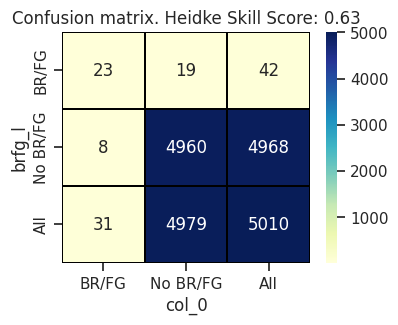

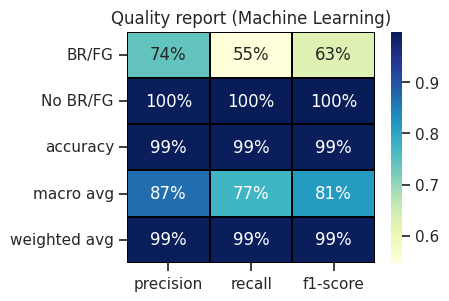

,feature,feature_per
32,rh1,7.6%
7,rh0,6.1%
50,hour,3.7%
9,lhflx0,3.5%
53,weekofyear,3.3%
52,dayofyear,3.3%
51,month,3.1%
34,lhflx1,3.0%
38,swflx1,2.8%
31,temp1,2.8%


Round 5


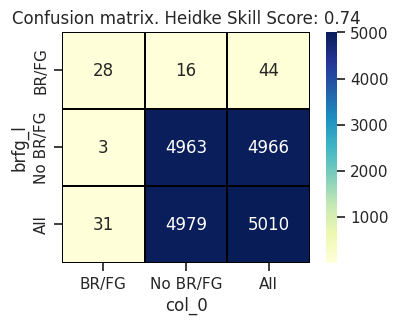

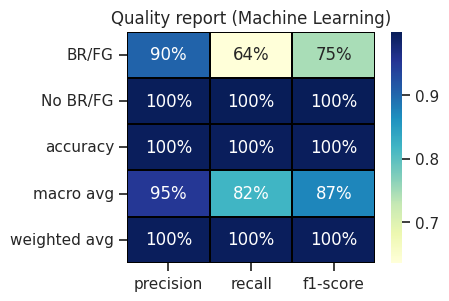

,feature,feature_per
7,rh0,7.3%
32,rh1,7.1%
51,month,4.6%
53,weekofyear,3.3%
52,dayofyear,3.2%
50,hour,3.2%
31,temp1,3.1%
2,snowlevel0,2.9%
34,lhflx1,2.9%
27,snowlevel1,2.6%


Round 6


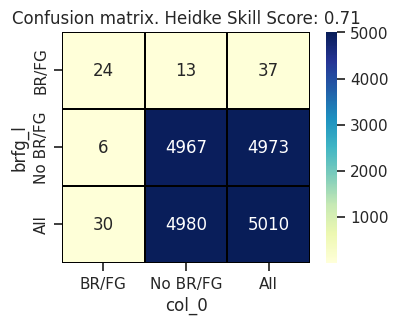

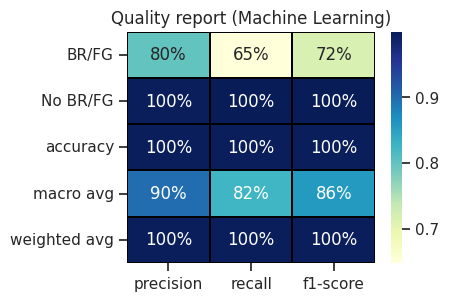

,feature,feature_per
7,rh0,6.7%
32,rh1,6.5%
53,weekofyear,4.0%
52,dayofyear,4.0%
51,month,3.7%
31,temp1,3.4%
34,lhflx1,3.4%
50,hour,3.1%
49,T8501,2.9%
24,T8500,2.6%


Round 7


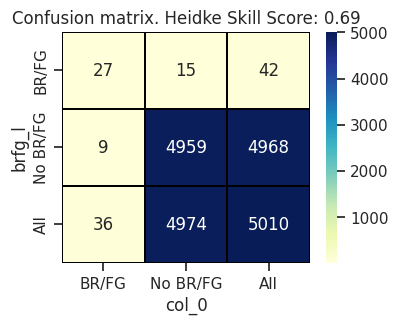

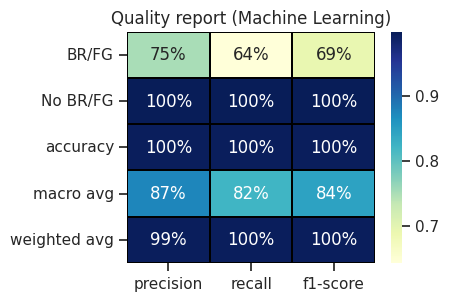

,feature,feature_per
32,rh1,7.1%
7,rh0,6.7%
53,weekofyear,4.3%
51,month,3.9%
50,hour,3.2%
31,temp1,3.2%
34,lhflx1,3.0%
52,dayofyear,2.9%
27,snowlevel1,2.8%
6,temp0,2.7%


Round 8


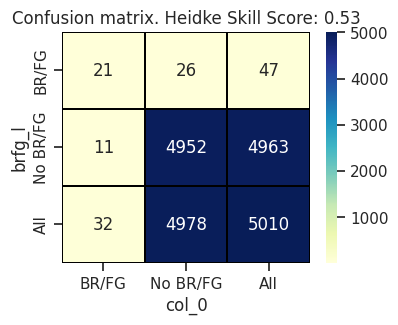

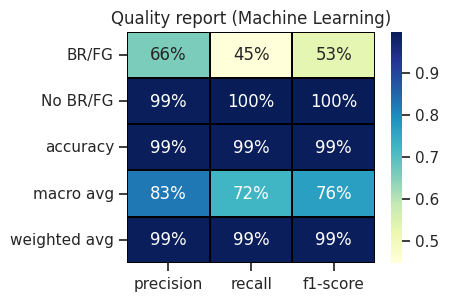

,feature,feature_per
32,rh1,8.1%
7,rh0,6.9%
51,month,3.6%
50,hour,3.5%
53,weekofyear,3.4%
9,lhflx0,2.9%
38,swflx1,2.9%
31,temp1,2.8%
52,dayofyear,2.8%
34,lhflx1,2.7%


Round 9


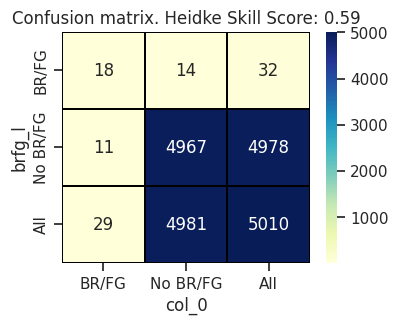

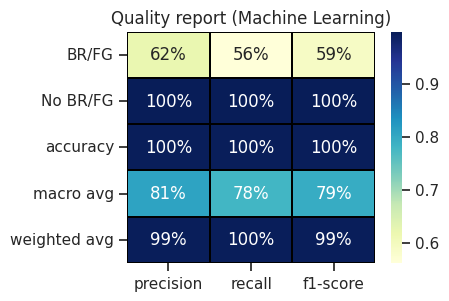

,feature,feature_per
32,rh1,6.8%
7,rh0,6.3%
50,hour,4.5%
34,lhflx1,4.2%
51,month,3.8%
53,weekofyear,3.5%
31,temp1,3.2%
52,dayofyear,3.1%
9,lhflx0,2.8%
49,T8501,2.7%



HSS stadistics
             HSS
count  10.000000
mean    0.619597
std     0.077111
min     0.528059
25%     0.556100
50%     0.607572
75%     0.678432
max     0.744814
Shapiro test normality
p value: 0.4390089511871338
Accept null hypothesis: normal distribution variable HSS in the samples
chi2_contingency last round
p-value: 0.0
Significance level: 0.01
Degres of of freedom:  1
Stadistic 1638.4275591090957
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 1.46 minutes


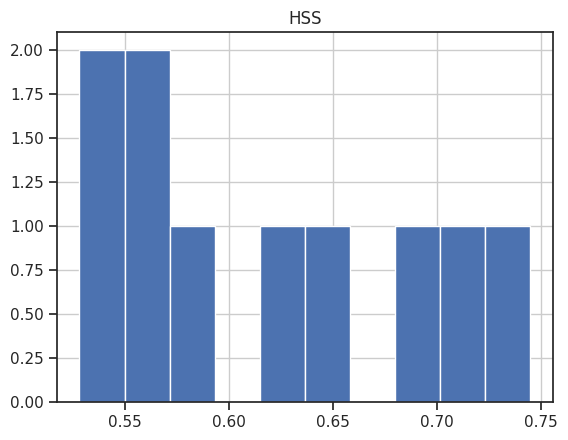

In [6]:
#@title ML RandomForestClassifier. Samples 10. Heidke Skill score.
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

start_time = time.time()

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.brfg_l
X = df_all.iloc[:,1:]


# loop random
HSS_E = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  #ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  ml_model = ExtraTreesClassifier().fit(X_res,y_res)
  #ml_model = Perceptron().fit(X_res,y_res)
  #ml_model = RandomForestClassifier().fit(X_res,y_res)

  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_E.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  plt.figure(figsize=(4, 3))
  plt.title("Confusion matrix. Heidke Skill Score: {}".format(round(HSS_E[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])

print("\nHSS stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS_E,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS_E)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(HSS_E,columns=["HSS"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")







In [7]:
#@title Save last heavy algorithm round 9
x_var = X.columns
score = {"HSS_ml":HSS_E[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
#pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/LEBL/algorithms/brfg_LEBL_d0.al", 'wb'))

*****************************


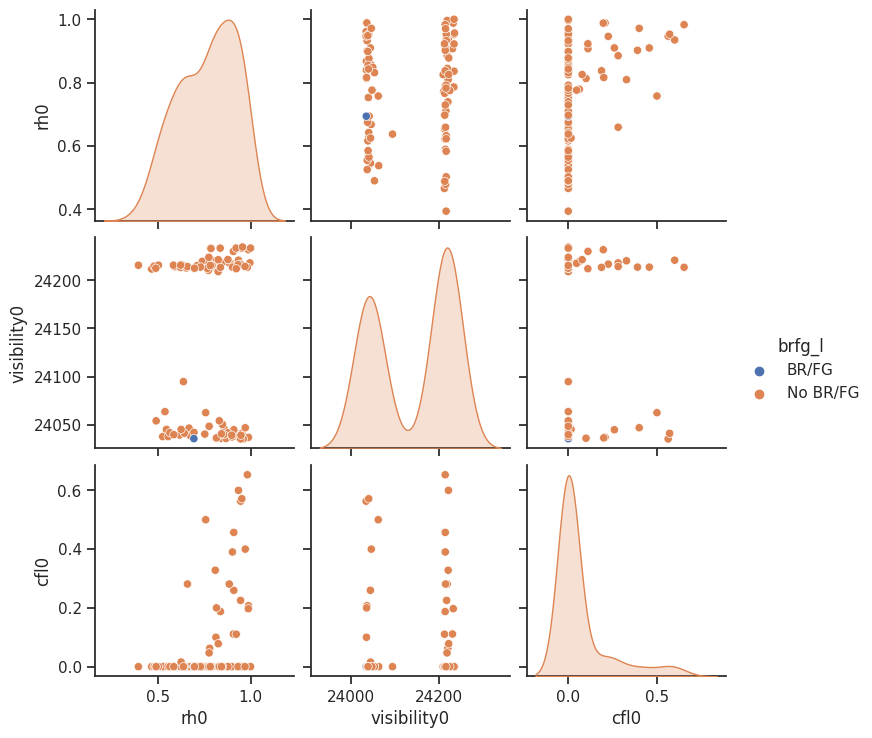

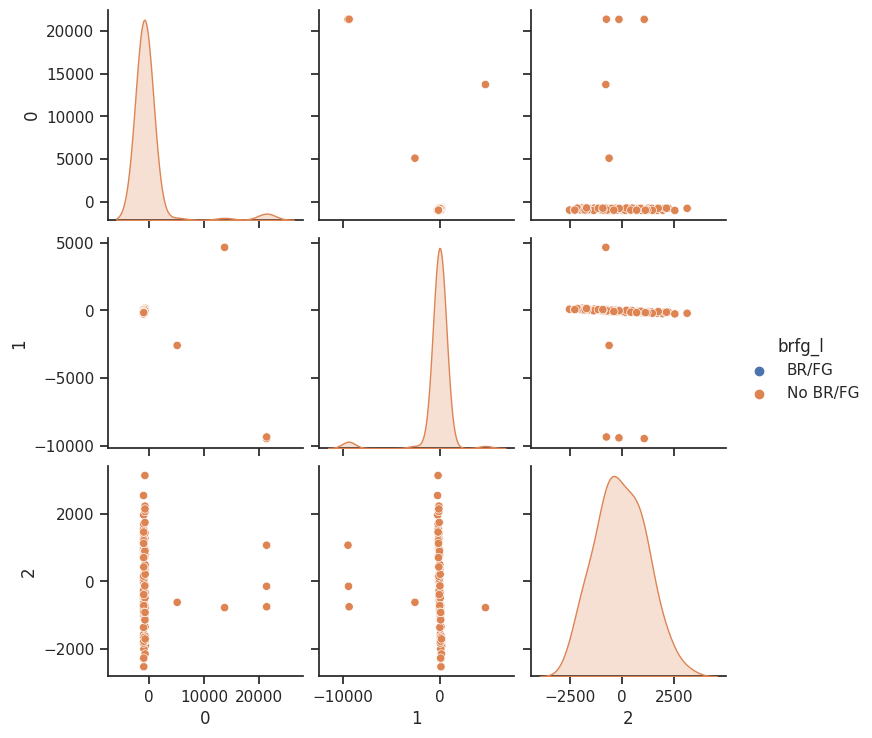

In [8]:
#@title Load meteorological model forecast D1. Display relation BRFG with model variables.
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD1Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD1Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD1Y2020.csv",parse_dates=["time"])

model = pd.concat([mody2018,mody2019,mody2020]).drop(columns=["Unnamed: 0"]).set_index("time")

#concat station file versus meteorological model file same time
df_all = pd.concat([station,model],axis=1).drop(columns=["wxcodes_o",]).dropna()
#display(df_all)

#display relation br fg with meteorological model variables
print("*****************************")

sns.set_theme(style="ticks")
df = df_all[["brfg_l","rh0","visibility0","cfl0"]].sample(100)
#plt.figure(figsize=(12, 10))
#plt.title("Display relation br fg with meteorological model variables sample=100")
g1 = sns.pairplot(df, hue="brfg_l");
plt.show()

#display relation br fg with meteorological PCA
df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all.iloc[:,1:]),
                                                       index =df_all.index)
df_pca["brfg_l"] = df_all.brfg_l
#plt.figure(figsize=(12, 10))
#plt.title("PCA analysis sample=100")
g2 = sns.pairplot(df_pca.sample(100), hue="brfg_l");
plt.show()

Round 0


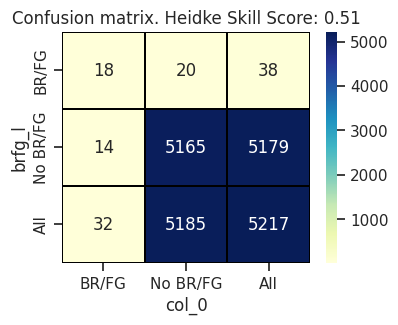

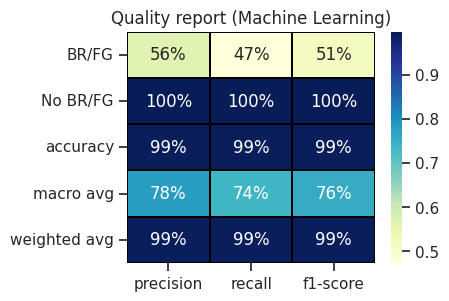

,feature,feature_per
33,visibility1,4.0%
52,dayofyear,3.8%
25,dir1,3.7%
31,temp1,3.5%
50,hour,3.3%
39,shflx1,2.9%
32,rh1,2.6%
2,snowlevel0,2.6%
8,visibility0,2.5%
16,cin0,2.5%


Round 1


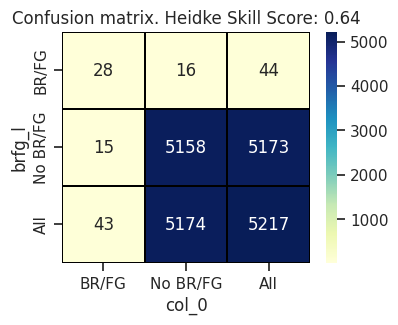

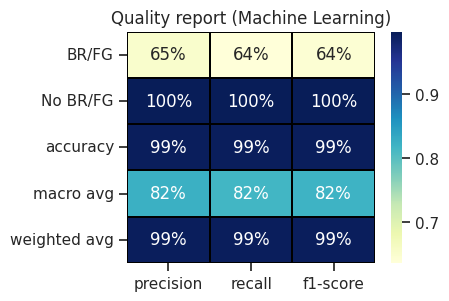

,feature,feature_per
25,dir1,4.5%
52,dayofyear,4.1%
8,visibility0,3.9%
31,temp1,3.8%
33,visibility1,3.2%
32,rh1,3.1%
39,shflx1,2.8%
50,hour,2.8%
34,lhflx1,2.7%
2,snowlevel0,2.5%


Round 2


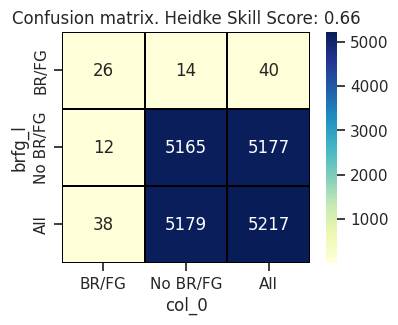

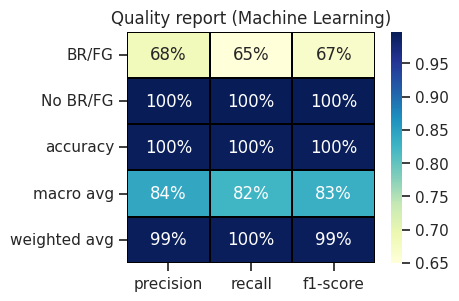

,feature,feature_per
52,dayofyear,3.8%
31,temp1,3.8%
25,dir1,3.6%
33,visibility1,3.5%
8,visibility0,3.2%
50,hour,3.2%
39,shflx1,3.2%
32,rh1,3.0%
42,cfh1,2.7%
0,dir0,2.6%


Round 3


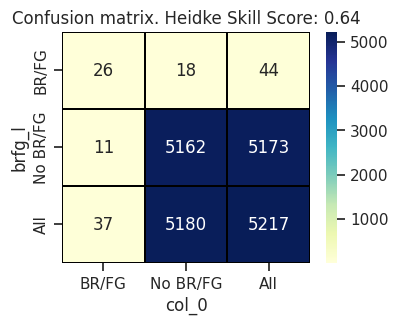

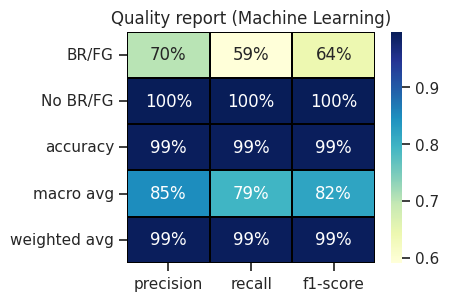

,feature,feature_per
25,dir1,4.4%
52,dayofyear,4.2%
8,visibility0,3.7%
34,lhflx1,3.6%
33,visibility1,3.4%
31,temp1,3.3%
50,hour,3.1%
0,dir0,2.8%
39,shflx1,2.8%
32,rh1,2.7%


Round 4


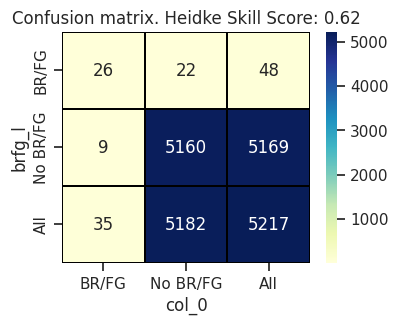

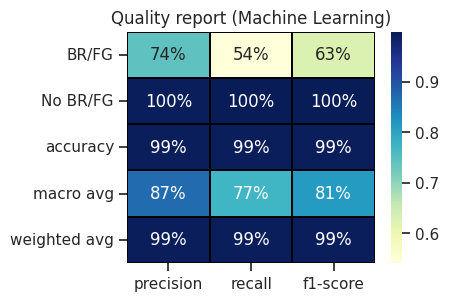

,feature,feature_per
52,dayofyear,3.8%
25,dir1,3.8%
31,temp1,3.6%
50,hour,3.5%
33,visibility1,3.5%
8,visibility0,3.1%
48,T5001,3.0%
39,shflx1,2.8%
32,rh1,2.7%
30,mslp1,2.5%


Round 5


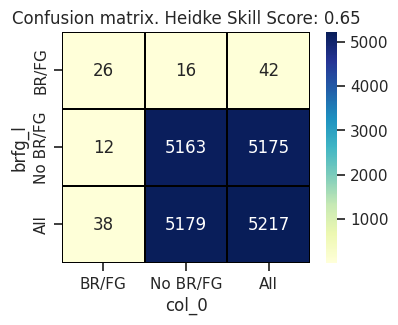

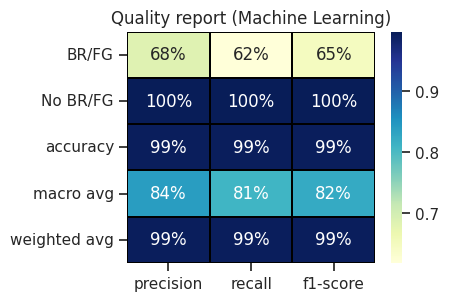

,feature,feature_per
25,dir1,4.1%
52,dayofyear,3.9%
31,temp1,3.4%
8,visibility0,3.4%
32,rh1,3.3%
50,hour,3.1%
33,visibility1,3.0%
34,lhflx1,2.7%
0,dir0,2.6%
39,shflx1,2.6%


Round 6


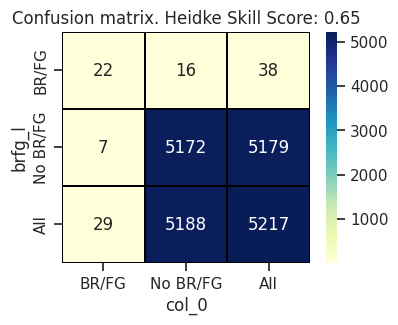

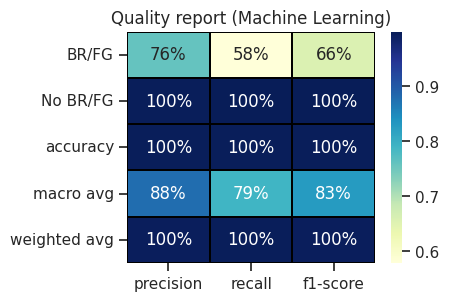

,feature,feature_per
33,visibility1,3.9%
31,temp1,3.8%
52,dayofyear,3.7%
8,visibility0,3.7%
50,hour,3.5%
25,dir1,3.4%
32,rh1,3.4%
2,snowlevel0,2.8%
30,mslp1,2.8%
39,shflx1,2.7%


Round 7


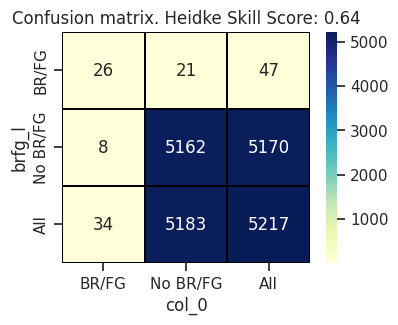

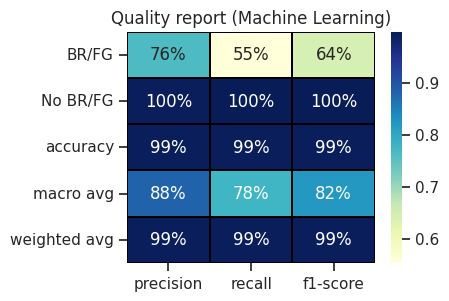

,feature,feature_per
52,dayofyear,4.3%
25,dir1,4.0%
33,visibility1,3.8%
31,temp1,3.8%
8,visibility0,3.3%
32,rh1,3.2%
50,hour,3.0%
39,shflx1,3.0%
0,dir0,2.9%
23,T5000,2.7%


Round 8


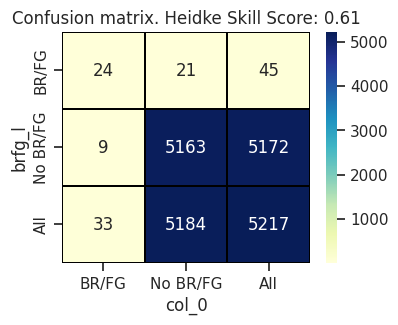

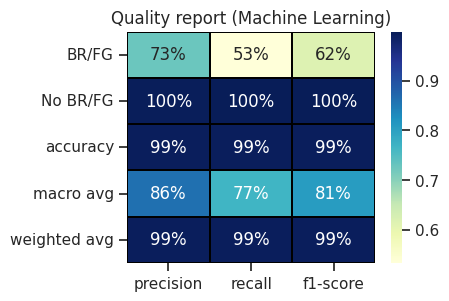

,feature,feature_per
25,dir1,3.9%
8,visibility0,3.8%
52,dayofyear,3.8%
33,visibility1,3.6%
50,hour,3.5%
0,dir0,3.2%
34,lhflx1,3.1%
32,rh1,3.0%
31,temp1,3.0%
39,shflx1,2.6%


Round 9


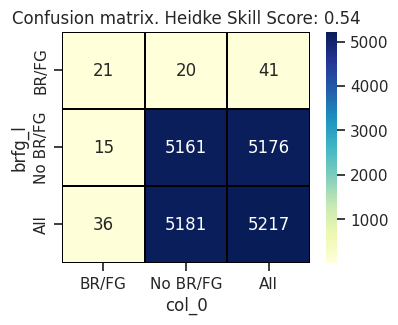

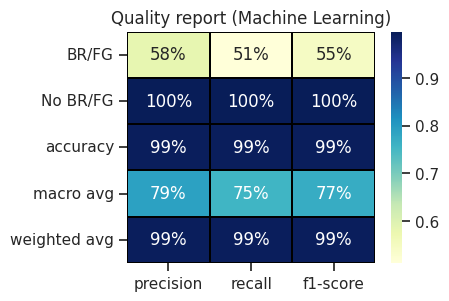

,feature,feature_per
52,dayofyear,4.5%
33,visibility1,3.8%
32,rh1,3.2%
25,dir1,3.2%
50,hour,3.2%
0,dir0,3.2%
39,shflx1,3.1%
31,temp1,3.0%
6,temp0,2.9%
8,visibility0,2.9%



HSS stadistics
             HSS
count  10.000000
mean    0.617438
std     0.050555
min     0.511029
25%     0.615314
50%     0.639221
75%     0.645648
max     0.664158
Shapiro test normality
p value: 0.00958151463419199
Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples
chi2_contingency last round
p-value: 0.0
Significance level: 0.01
Degres of of freedom:  1
Stadistic 1466.240122968274
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 1.16 minutes


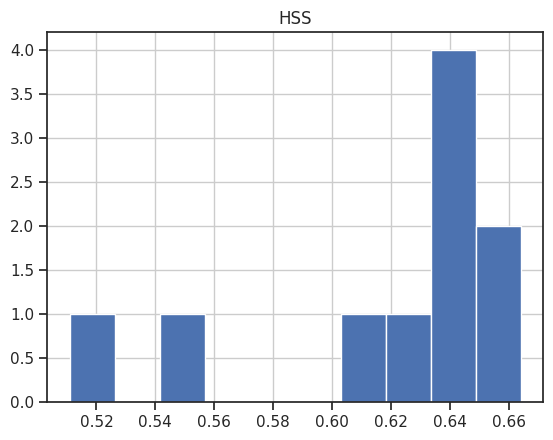

In [9]:
#@title ML LGBMClassifier. Samples 10. Heidke Skill score

start_time = time.time()

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.brfg_l
X = df_all.iloc[:,1:]


# loop random
HSS = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  plt.figure(figsize=(4, 3))
  plt.title("Confusion matrix. Heidke Skill Score: {}".format(round(HSS[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])



print("\nHSS stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(HSS,columns=["HSS"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")

In [10]:
#@title Save last algorithm round 9


x_var = X.columns
score = {"HSS_ml":HSS[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/LEBL/algorithms/brfg_LEBL_d1.al", 'wb'))

Round 0


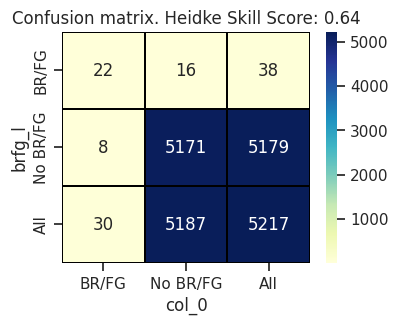

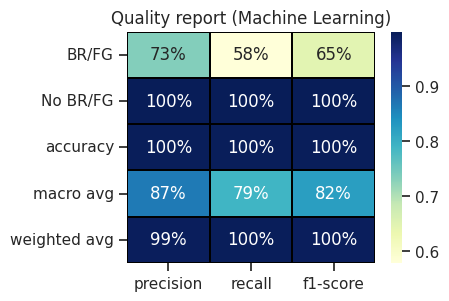

,feature,feature_per
32,rh1,7.9%
7,rh0,6.7%
33,visibility1,3.8%
31,temp1,3.7%
51,month,3.6%
6,temp0,3.2%
53,weekofyear,3.2%
52,dayofyear,3.1%
34,lhflx1,3.1%
50,hour,2.6%


Round 1


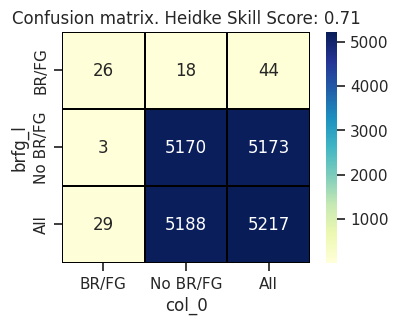

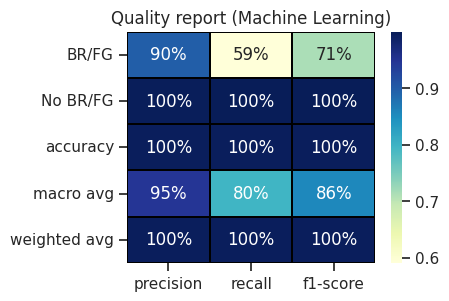

,feature,feature_per
32,rh1,8.2%
7,rh0,6.2%
33,visibility1,4.9%
51,month,3.7%
31,temp1,3.1%
52,dayofyear,2.9%
34,lhflx1,2.9%
50,hour,2.8%
2,snowlevel0,2.8%
53,weekofyear,2.7%


Round 2


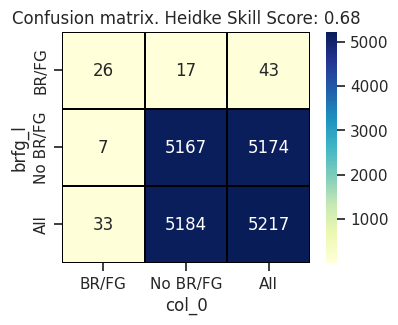

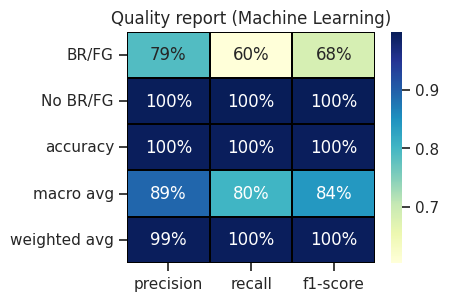

,feature,feature_per
32,rh1,8.4%
7,rh0,5.6%
33,visibility1,4.7%
53,weekofyear,4.4%
51,month,3.8%
52,dayofyear,3.6%
31,temp1,3.6%
34,lhflx1,3.5%
6,temp0,2.6%
50,hour,2.6%


Round 3


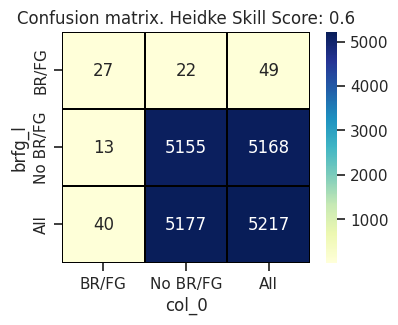

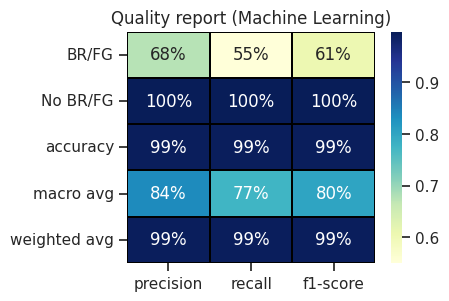

,feature,feature_per
7,rh0,7.5%
32,rh1,6.7%
33,visibility1,5.2%
51,month,3.6%
31,temp1,3.1%
38,swflx1,3.0%
53,weekofyear,3.0%
52,dayofyear,2.9%
50,hour,2.9%
23,T5000,2.6%


Round 4


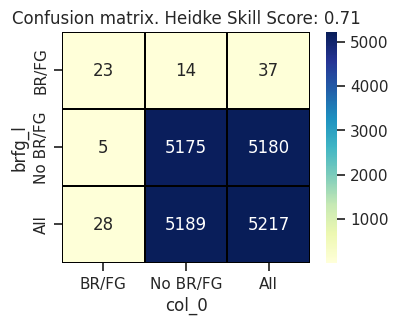

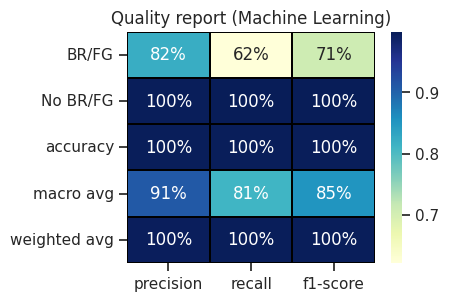

,feature,feature_per
32,rh1,7.7%
7,rh0,6.1%
33,visibility1,4.1%
51,month,3.7%
53,weekofyear,3.6%
34,lhflx1,3.6%
52,dayofyear,3.3%
50,hour,3.1%
31,temp1,2.9%
6,temp0,2.6%


Round 5


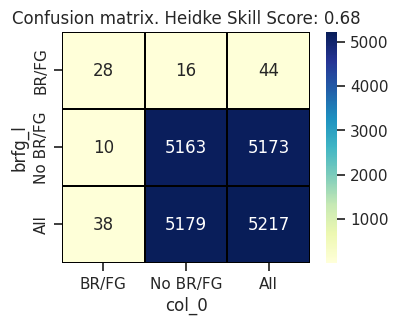

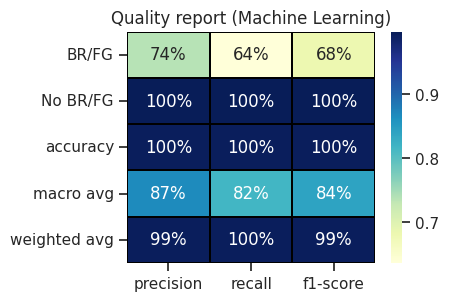

,feature,feature_per
7,rh0,7.8%
32,rh1,7.1%
33,visibility1,4.8%
31,temp1,3.7%
52,dayofyear,3.7%
51,month,3.4%
53,weekofyear,2.9%
50,hour,2.7%
27,snowlevel1,2.5%
9,lhflx0,2.5%


Round 6


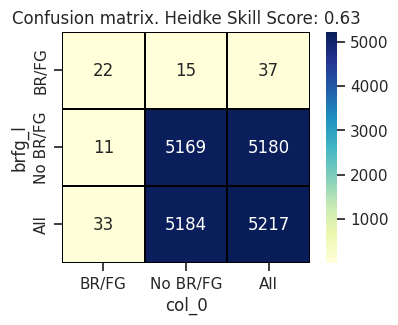

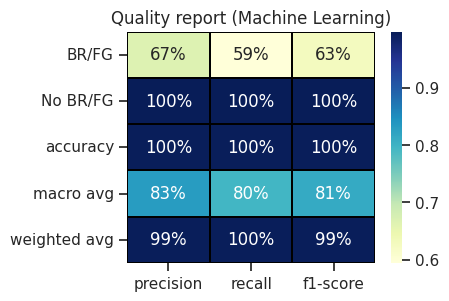

,feature,feature_per
32,rh1,7.3%
7,rh0,6.3%
33,visibility1,5.5%
51,month,3.7%
53,weekofyear,3.5%
52,dayofyear,3.4%
31,temp1,3.1%
34,lhflx1,3.0%
50,hour,2.9%
38,swflx1,2.7%


Round 7


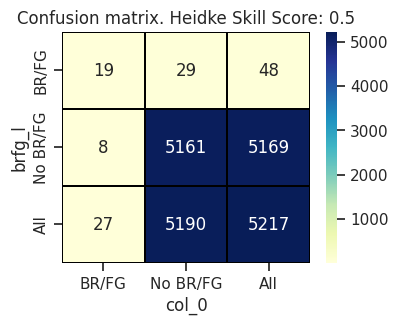

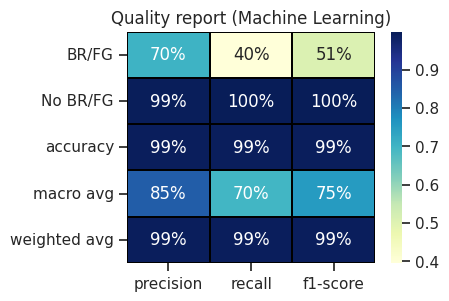

,feature,feature_per
32,rh1,8.5%
7,rh0,7.2%
33,visibility1,4.5%
53,weekofyear,3.8%
51,month,3.8%
34,lhflx1,3.3%
38,swflx1,3.2%
31,temp1,3.1%
9,lhflx0,2.8%
50,hour,2.8%


Round 8


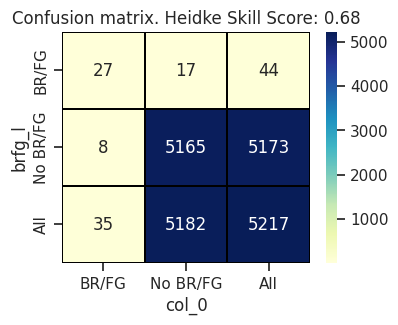

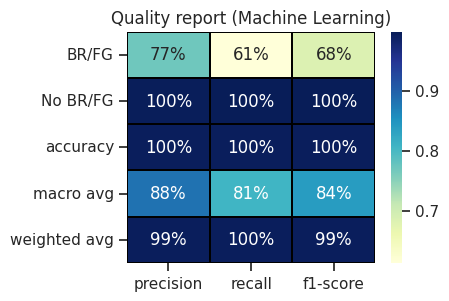

,feature,feature_per
32,rh1,8.3%
7,rh0,6.0%
33,visibility1,4.0%
51,month,3.7%
31,temp1,3.3%
52,dayofyear,3.2%
50,hour,3.2%
38,swflx1,3.0%
6,temp0,2.9%
34,lhflx1,2.9%


Round 9


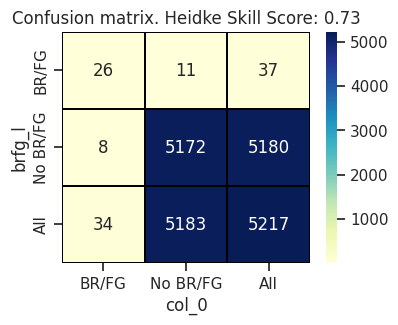

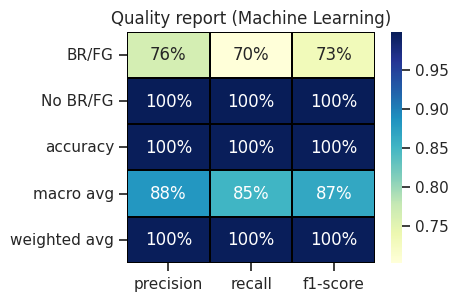

,feature,feature_per
32,rh1,6.8%
7,rh0,6.5%
33,visibility1,4.7%
53,weekofyear,4.2%
51,month,3.7%
52,dayofyear,3.1%
50,hour,2.9%
38,swflx1,2.9%
31,temp1,2.9%
34,lhflx1,2.6%



HSS stadistics
             HSS
count  10.000000
mean    0.656799
std     0.066655
min     0.503377
25%     0.630747
50%     0.680795
75%     0.699905
max     0.730564
Shapiro test normality
p value: 0.11980605870485306
Accept null hypothesis: normal distribution variable HSS in the samples
chi2_contingency last round
p-value: 0.0
Significance level: 0.01
Degres of of freedom:  1
Stadistic 2682.245791357736
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 1.15 minutes


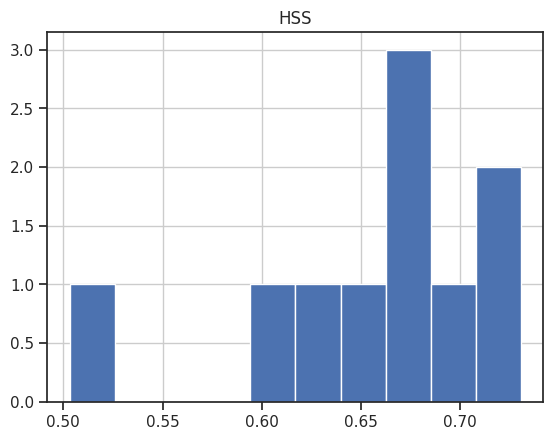

In [11]:
#@title ML RandomForestClassifier. Samples 10. Heidke Skill score.
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

start_time = time.time()

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.brfg_l
X = df_all.iloc[:,1:]


# loop random
HSS_E = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  #ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  ml_model = ExtraTreesClassifier().fit(X_res,y_res)
  #ml_model = Perceptron().fit(X_res,y_res)
  #ml_model = RandomForestClassifier().fit(X_res,y_res)

  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_E.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  plt.figure(figsize=(4, 3))
  plt.title("Confusion matrix. Heidke Skill Score: {}".format(round(HSS_E[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])

print("\nHSS stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS_E,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS_E)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(HSS_E,columns=["HSS"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")



In [ ]:
#@title Save last heavy algorithm round 9
x_var = X.columns
score = {"HSS_ml":HSS_E[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
#pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/LEBL/algorithms/brfg_LEBL_d1.al", 'wb'))